# Full forward pass & decode with Mobilenet + ImageNet

## 1.- Imports

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt
from generate_mobilenet import Mobilenet, decode_predictions
import pathlib

## 2.- Model instantiation

In [2]:
path = pathlib.Path('.').parent.joinpath('debug', 'notebooks').resolve()
mobilenet = Mobilenet('MobileNet', path)

In [3]:
mobilenet.build()

weights shape (1, 1, 256, 1000)
bias shape (1000,)
truncated weights shape (256, 100)
truncated bias shape (100,)
(256, 100) (100,)
True
True
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_0.25_224 (Model)   (None, 4, 4, 256)         218544    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
Total params: 244,244
Trainable params: 238,772
Non-trainable params: 5,472
_________________________________________________________________


## 3.- ImageNet labels

In [4]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
print(len(imagenet_labels))


1001
/home/luismata/ai_tools/ai_tools_gpu_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/luismata/.keras/datasets/ImageNetLabels.txt' mode='r' encoding='UTF-8'>
  after removing the cwd from sys.path.


In [ ]:
print(imagenet_labels[-100:])
print(imagenet_labels[:100])

In [ ]:
print('pizza' in imagenet_labels[-100:])
print('vulture' in imagenet_labels[-100:])
print('goldfish' in imagenet_labels[:100])
print('vulture' in imagenet_labels[:100])
imagenet_labels = imagenet_labels[:100]
print(imagenet_labels.shape)
print(imagenet_labels)

## 4.- Example image
The two links provided are from TensorFlow and Wikipedia
![TensorFlow][https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg]
![Wikipedia][https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Dog_for_Senior_Dog_Food_Diet_Wikipedia_Page.jpg/1200px-Dog_for_Senior_Dog_Food_Diet_Wikipedia_Page.jpg]

(-0.5, 158.5, 158.5, -0.5)

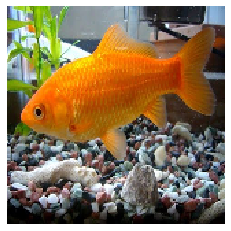

In [5]:
#image_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg"
image_url = 'https://fthmb.tqn.com/VHeLk32zZhv3Kp70RBinGvF_dmM=/3920x2160/filters:fill(auto,1)/GettyImages-597572085-584819855f9b5851e593fd0b.jpg'
pizza_url = 'https://upload.wikimedia.org/wikipedia/commons/2/2d/Punch_Neapolitan_Pizza_Margherita.jpg'
goldfish_url = 'https://i.ytimg.com/vi/DSDUCxvb7R4/hqdefault.jpg'
#'https://upload.wikimedia.org/wikipedia/commons/6/6a/Blue-spotted_salamander_(Ambystoma_laterale).jpg'
#'https://en.wikipedia.org/wiki/Spotted_salamander#/media/File:Spotted_Salamander,_Cantley,_Quebec.jpg'
#'https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Dog_for_Senior_Dog_Food_Diet_Wikipedia_Page.jpg/1200px-Dog_for_Senior_Dog_Food_Diet_Wikipedia_Page.jpg'
f = tf.keras.utils.get_file("goldfishh", goldfish_url)
img = tf.keras.preprocessing.image.load_img(f, target_size=[159, 159])
x = tf.keras.preprocessing.image.img_to_array(img)
goldfish = tf.keras.applications.mobilenet.preprocess_input(x[tf.newaxis,...])
plt.imshow(img)
plt.axis('off')


In [ ]:
f = tf.keras.utils.get_file("pizza", pizza_url)
img = tf.keras.preprocessing.image.load_img(f, target_size=[159, 159])
x = tf.keras.preprocessing.image.img_to_array(img)
pizza = tf.keras.applications.mobilenet.preprocess_input(x[tf.newaxis,...])
plt.imshow(img)
plt.axis('off')

## 5.- Mobilenet output

In [ ]:
output_pizza = mobilenet.core_model(pizza)
output_pizza.shape

In [6]:
output_goldfish = mobilenet.core_model(goldfish)
output_goldfish.shape
print(np.argmax(output_goldfish))
imagenet_labels[95]


94


'hummingbird'

In [7]:
decode_predictions(output_goldfish)

40960/35363 [==================================] - 0s 4us/step


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'argsort'

## 6.- Decoded output

In [ ]:
decoded = imagenet_labels[np.argsort(output_pizza)[0,::-1][:5]+1]
print(len(decoded[0][0]))
print(decoded)

In [ ]:
decoded = imagenet_labels[np.argsort(output_goldfish)[0,::-1][:5]+1]
print(len(decoded[0][0]))
print(decoded)